In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
data = pd.read_csv(r'D:\download 99\Dream\Ai_Roadmap\Machine Learning\Ml_projects\Bengaluru_House_pricing\Dataset\Bengaluru_House_Data.csv')

In [3]:
print("-----------------------------------shape Size----------------------------------------------")
print(data.shape)
data.head()

-----------------------------------shape Size----------------------------------------------
(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# Extract the numerical value for number of bedrooms
data['bedrooms'] = data['size'].str.extract('(\\d+)').astype(float)
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2.0


In [5]:
print("-----------------------------------Data Type-----------------------------------------------")
print(data.dtypes)

-----------------------------------Data Type-----------------------------------------------
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
bedrooms        float64
dtype: object


In [6]:
print("-----------------------------------Data unique---------------------------------------------")
print(data.nunique(), "\n")

-----------------------------------Data unique---------------------------------------------
area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
bedrooms          19
dtype: int64 



In [7]:
print("-----------------------------------Null values---------------------------------------------")
print(data.isnull().sum())

-----------------------------------Null values---------------------------------------------
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
bedrooms          16
dtype: int64


**Drop unnecessary columns**

In [8]:
new_data = data.drop(["availability","society","size"], axis=1)
new_data.head()

,area_type,location,total_sqft,bath,balcony,price,bedrooms
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2.0


**Handling null values**

i used: 

    mode for "location"
    mean for "bath","balcony","BHK"

In [9]:
# Use a dictionary-based filling method
new_data.fillna({'location': new_data['location'].mode()[0],
                 'bath': new_data['bath'].mean(),
                 'balcony': new_data['balcony'].mean(),
                 'bedrooms': new_data['bedrooms'].mean()}, inplace=True)

# Check for null values after filling
print("--------------------Check Null Data after Applying Missing Value---------------------")
print(new_data.isna().sum())


--------------------Check Null Data after Applying Missing Value---------------------
area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bedrooms      0
dtype: int64


**Encoding**

I used label encoding for "area_type" 

In [10]:
from sklearn.preprocessing import LabelEncoder
# label Encoding or we can use cat.codes
new_data['area_type'] = new_data['area_type'].astype('category') # Convert the 'object' column to categorical
new_data['area_type'] = new_data['area_type'].cat.codes
print(new_data['area_type'].value_counts())

area_type
3    8790
0    2418
2    2025
1      87
Name: count, dtype: int64


And i grouped the location that has distribution less than 10 into other 

In [11]:
# Strip whitespace from the 'location' column
new_data['location'] = new_data['location'].apply(lambda x: x.strip())
# Group by the 'location' and count occurrences
location_stats = new_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
# Display the location statistics
print(location_stats)

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
sapthagiri Layout          1
sarjapura main road        1
kamanahalli main road      1
kanakapura main road       1
kanakapura road            1
Name: location, Length: 1294, dtype: int64


In [12]:
len(location_stats[location_stats<=10])

1053

In [13]:
location_stats_less_than_10 = location_stats[location_stats<=10]
new_data['location'] = new_data.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(new_data.location.unique())

242

In [14]:
# One-Hot Encoding for the 'location' column
dumies = pd.get_dummies(new_data.location)
# Display the first few rows of the updated DataFrame
dumies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
new_data2 = pd.concat([new_data,dumies.drop('other',axis='columns')],axis='columns')
new_data2 = new_data2.drop('location',axis='columns')
new_data2.head()

,area_type,total_sqft,bath,balcony,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3,1056,2.0,1.0,39.07,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2600,5.0,3.0,120.00,4.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1440,2.0,3.0,62.00,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1521,3.0,1.0,95.00,3.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1200,2.0,1.0,51.00,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Cleaning**

I found that "total_sqft" containes ranges and values with unites so i build a function that takes the average of these ranges and convert the unites into sqft

In [16]:
# Identify unique non-numeric values in the total_sqft column
non_numeric_values = new_data2['total_sqft'][~new_data2['total_sqft'].str.isnumeric()].unique()

print(non_numeric_values)


['2100 - 2850' '1330.74' '3010 - 3410' '2957 - 3450' '3067 - 8156'
 '1042 - 1105' '1563.05' '1145 - 1340' '1015 - 1540' '1520 - 1740'
 '2023.71' '1113.27' '34.46Sq. Meter' '1752.12' '1195 - 1440'
 '1200 - 2400' '4125Perch' '1120 - 1145' '4400 - 6640' '3090 - 5002'
 '4400 - 6800' '1160 - 1195' '1000Sq. Meter' '4000 - 5249' '1115 - 1130'
 '1100Sq. Yards' '520 - 645' '1000 - 1285' '3606 - 5091' '650 - 665'
 '633 - 666' '2112.95' '5.31Acres' '30Acres' '1445 - 1455' '884 - 1116'
 '850 - 1093' '1440 - 1884' '1558.67' '3467.86' '716Sq. Meter'
 '547.34 - 827.31' '804.1' '580 - 650' '3425 - 3435' '1269.72'
 '1804 - 2273' '3630 - 3800' '660 - 670' '1500Sq. Meter' '620 - 933'
 '142.61Sq. Meter' '2695 - 2940' '2000 - 5634' '1574Sq. Yards'
 '3450 - 3472' '2479.13' '2172.65' '581.91' '1250 - 1305' '670 - 980'
 '1005.03 - 1252.49' '1004 - 1204' '361.33Sq. Yards' '645 - 936'
 '2710 - 3360' '1452.55' '2249.81 - 4112.19' '3436 - 3643' '2830 - 2882'
 '596 - 804' '1776.42' '1255 - 1863' '1300 - 1405' '150

In [17]:
import re

def clean_total_sqft(val):
    # Case 1: If the value is a range (e.g., "1500 - 1800")
    if '-' in val:
        vals = val.split('-')
        return (float(vals[0]) + float(vals[1])) / 2  # Take the average of the range
    
    # Case 2: Unit conversion
    if 'Meter' in val:
        return float(re.findall(r'\d+\.?\d*', val)[0]) * 10.7639  # Convert Sq. Meter to Sq. Ft.
    elif 'Yards' in val:
        return float(re.findall(r'\d+\.?\d*', val)[0]) * 9  # Convert Sq. Yards to Sq. Ft.
    elif 'Acre' in val:
        return float(re.findall(r'\d+\.?\d*', val)[0]) * 43560  # Convert Acres to Sq. Ft.
    elif 'Sq' in val:  # Assume this is already in Sq. Ft.
        return float(re.findall(r'\d+\.?\d*', val)[0])
    
    # Case 3: Numeric values
    try:
        return float(val)
    except ValueError:
        return np.nan  # Return NaN if conversion fails

# Apply the cleaning function to the column
new_data2['total_sqft_cleaned'] = new_data2['total_sqft'].apply(clean_total_sqft)

# Check the cleaned column
print(new_data2[['total_sqft', 'total_sqft_cleaned']].head())


  total_sqft  total_sqft_cleaned
0       1056              1056.0
1       2600              2600.0
2       1440              1440.0
3       1521              1521.0
4       1200              1200.0


In [18]:
new_data2 = new_data2.drop(["total_sqft"], axis=1)
new_data2.head()

,area_type,bath,balcony,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft_cleaned
0,3,2.0,1.0,39.07,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1056.0
1,2,5.0,3.0,120.00,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2600.0
2,0,2.0,3.0,62.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1440.0
3,3,3.0,1.0,95.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1521.0
4,3,2.0,1.0,51.00,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1200.0


**feature engineering**

I add a new column called "price_per_sqft" where i converted the currency and divided on "total_sqft_cleaned"

In [19]:
new_data2["price_per_sqft"] = new_data2["price"]*100000/new_data2["total_sqft_cleaned"]
new_data2.head() 

,area_type,bath,balcony,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,total_sqft_cleaned,price_per_sqft
0,3,2.0,1.0,39.07,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1056.0,3699.810606
1,2,5.0,3.0,120.00,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2600.0,4615.384615
2,0,2.0,3.0,62.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1440.0,4305.555556
3,3,3.0,1.0,95.00,3.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1521.0,6245.890861
4,3,2.0,1.0,51.00,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1200.0,4250.000000


**Outliers**

In [20]:
new_data2.describe()

,area_type,bath,balcony,price,bedrooms,total_sqft_cleaned,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.331400e+04,1.331400e+04
mean,2.290315,2.692610,1.584376,112.565627,2.803743,1.773683e+03,7.904885e+03
std,1.143846,1.337777,0.798360,148.971674,1.294196,1.312067e+04,1.062731e+05
min,0.000000,1.000000,0.000000,8.000000,1.000000,1.000000e+00,2.257423e+00
25%,2.000000,2.000000,1.000000,50.000000,2.000000,1.100000e+03,4.262295e+03
50%,3.000000,2.000000,2.000000,72.000000,3.000000,1.277000e+03,5.429218e+03
75%,3.000000,3.000000,2.000000,120.000000,3.000000,1.680000e+03,7.313266e+03
max,3.000000,40.000000,3.000000,3600.000000,43.000000,1.306800e+06,1.200000e+07


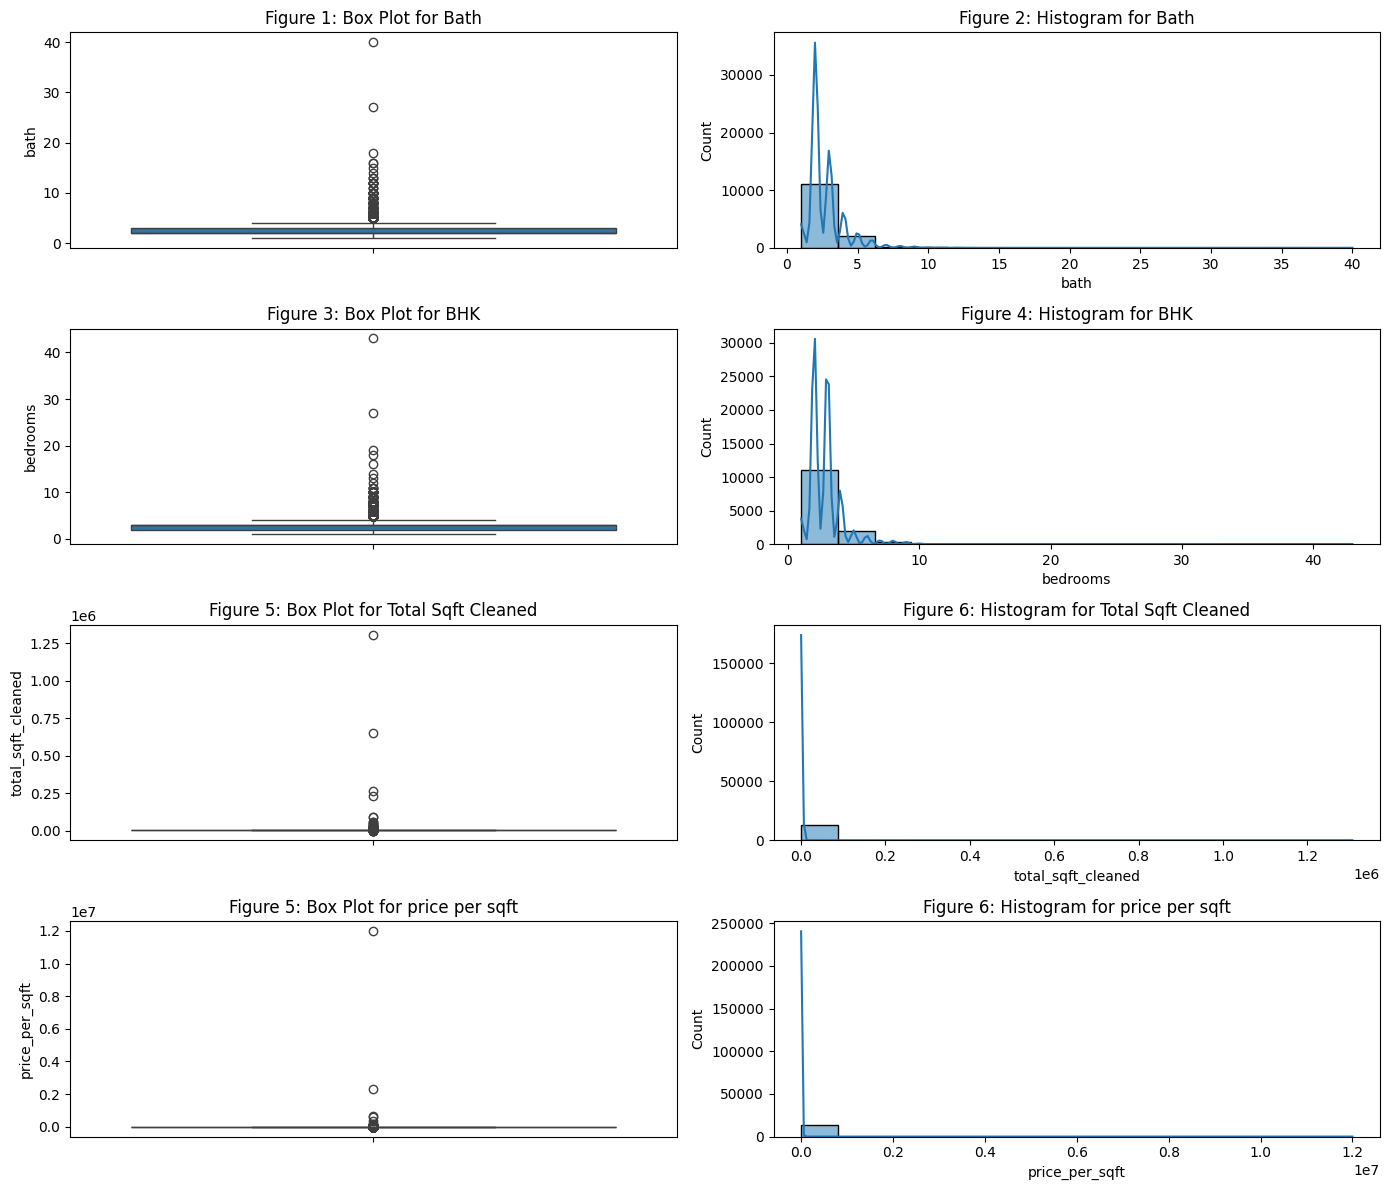

In [21]:
# Create a figure with 3 rows and 2 columns (3x2 grid)
fig, ax = plt.subplots(4, 2, figsize=(14, 12))  # figsize adjusts the size of the plots

# Box Plot for 'bath' (Figure 1)
sns.boxplot(new_data2["bath"], ax=ax[0, 0])
ax[0, 0].set_title('Figure 1: Box Plot for Bath')

# Histogram for 'bath' with KDE (Figure 2)
sns.histplot(new_data2["bath"], kde=True, bins=15, ax=ax[0, 1])
ax[0, 1].set_title('Figure 2: Histogram for Bath')

# Box Plot for 'BHK' (Figure 3)
sns.boxplot(new_data2["bedrooms"], ax=ax[1, 0])
ax[1, 0].set_title('Figure 3: Box Plot for BHK')

# Histogram for 'BHK' with KDE (Figure 4)
sns.histplot(new_data2["bedrooms"], kde=True, bins=15, ax=ax[1, 1])
ax[1, 1].set_title('Figure 4: Histogram for BHK')

# Box Plot for 'total_sqft_cleaned' (Figure 5)
sns.boxplot(new_data2["total_sqft_cleaned"], ax=ax[2, 0])
ax[2, 0].set_title('Figure 5: Box Plot for Total Sqft Cleaned')

# Histogram for 'total_sqft_cleaned' with KDE (Figure 6)
sns.histplot(new_data2["total_sqft_cleaned"], kde=True, bins=15, ax=ax[2, 1])
ax[2, 1].set_title('Figure 6: Histogram for Total Sqft Cleaned')

# Box Plot for 'total_sqft_cleaned' (Figure 5)
sns.boxplot(new_data2["price_per_sqft"], ax=ax[3, 0])
ax[3, 0].set_title('Figure 5: Box Plot for price per sqft')

# Histogram for 'total_sqft_cleaned' with KDE (Figure 6)
sns.histplot(new_data2["price_per_sqft"], kde=True, bins=15, ax=ax[3, 1])
ax[3, 1].set_title('Figure 6: Histogram for price per sqft')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [22]:
def remove_outliers_IQR(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the data to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

# Apply the function to remove outliers from 'BHK', 'bath', and 'total_sqft_cleaned'
new_data3 = remove_outliers_IQR(new_data2, 'bedrooms')
new_data3 = remove_outliers_IQR(new_data3, 'bath')
new_data3 = remove_outliers_IQR(new_data3, 'total_sqft_cleaned')
new_data3 = remove_outliers_IQR(new_data3, 'price_per_sqft')

# Display the shape of the original and filtered data
print(f"Original data size: {new_data2.shape}")
print(f"Data size after removing outliers: {new_data3.shape}")


Original data size: (13320, 248)
Data size after removing outliers: (10362, 248)


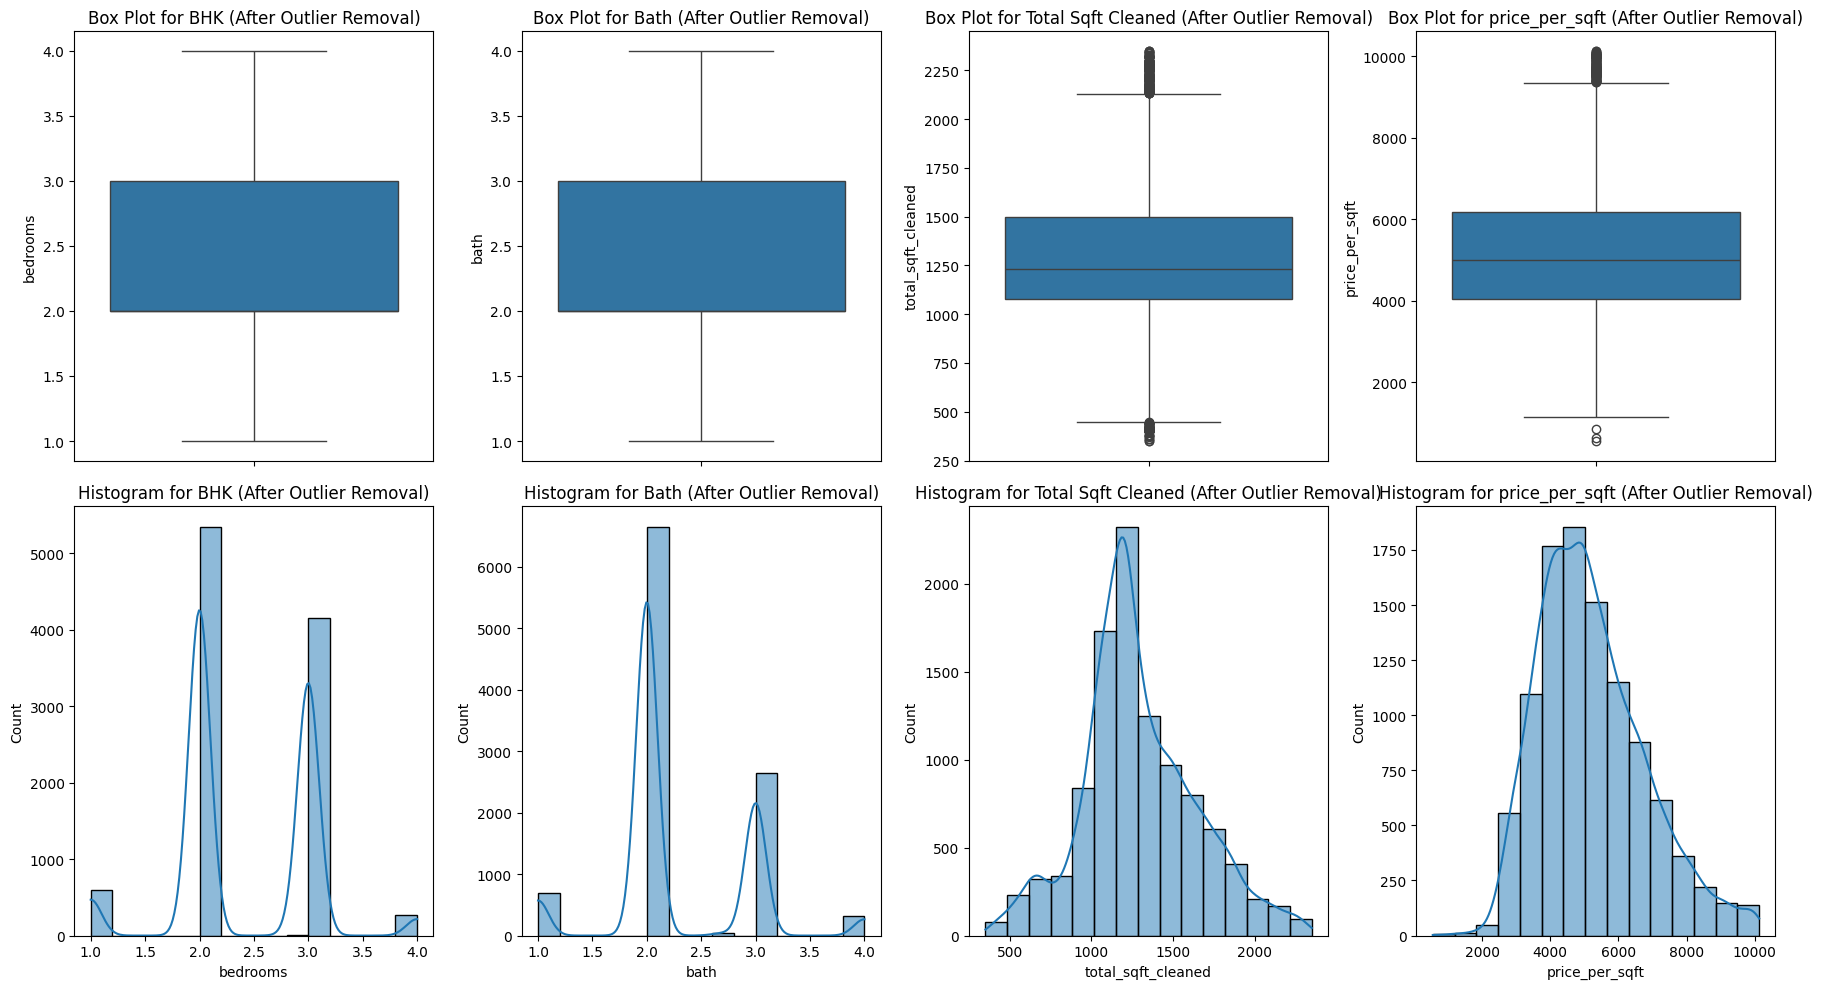

In [23]:
# Create a figure with 6 subplots (2 rows, 3 columns)
fig, ax = plt.subplots(2, 4, figsize=(18, 10))  # Adjust figsize to make it spacious

# Box Plot for 'BHK' (After Outlier Removal)
sns.boxplot(new_data3["bedrooms"], ax=ax[0, 0])
ax[0, 0].set_title('Box Plot for BHK (After Outlier Removal)')

# Histogram for 'BHK' with KDE (After Outlier Removal)
sns.histplot(new_data3["bedrooms"], kde=True, bins=15, ax=ax[1, 0])
ax[1, 0].set_title('Histogram for BHK (After Outlier Removal)')

# Box Plot for 'bath' (After Outlier Removal)
sns.boxplot(new_data3["bath"], ax=ax[0, 1])
ax[0, 1].set_title('Box Plot for Bath (After Outlier Removal)')

# Histogram for 'bath' with KDE (After Outlier Removal)
sns.histplot(new_data3["bath"], kde=True, bins=15, ax=ax[1, 1])
ax[1, 1].set_title('Histogram for Bath (After Outlier Removal)')

# Box Plot for 'total_sqft_cleaned' (After Outlier Removal)
sns.boxplot(new_data3["total_sqft_cleaned"], ax=ax[0, 2])
ax[0, 2].set_title('Box Plot for Total Sqft Cleaned (After Outlier Removal)')

# Histogram for 'total_sqft_cleaned' with KDE (After Outlier Removal)
sns.histplot(new_data3["total_sqft_cleaned"], kde=True, bins=15, ax=ax[1, 2])
ax[1, 2].set_title('Histogram for Total Sqft Cleaned (After Outlier Removal)')

# Box Plot for 'total_sqft_cleaned' (After Outlier Removal)
sns.boxplot(new_data3["price_per_sqft"], ax=ax[0, 3])
ax[0, 3].set_title('Box Plot for price_per_sqft (After Outlier Removal)')

# Histogram for 'total_sqft_cleaned' with KDE (After Outlier Removal)
sns.histplot(new_data3["price_per_sqft"], kde=True, bins=15, ax=ax[1, 3])
ax[1, 3].set_title('Histogram for price_per_sqft (After Outlier Removal)')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


In [24]:
new_data3.describe()

,area_type,bath,balcony,price,bedrooms,total_sqft_cleaned,price_per_sqft
count,10362.000000,10362.000000,10362.000000,10362.000000,10362.000000,10362.000000,10362.000000
mean,2.399054,2.253249,1.559639,68.842973,2.396221,1289.948396,5217.430676
std,1.146911,0.621186,0.764302,32.735089,0.636457,351.416622,1564.529648
min,0.000000,1.000000,0.000000,8.440000,1.000000,350.000000,556.306167
25%,3.000000,2.000000,1.000000,45.472500,2.000000,1080.000000,4050.000000
50%,3.000000,2.000000,2.000000,60.775000,2.000000,1230.500000,5000.000000
75%,3.000000,3.000000,2.000000,85.000000,3.000000,1500.000000,6169.307779
max,3.000000,4.000000,3.000000,225.000000,4.000000,2350.000000,10126.582278


In [25]:
# Rename a single column
new_data3 = new_data3.rename(columns={'total_sqft_cleaned': 'total_sqft'})

**Model Evaluation**

In [26]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Prepare the features and labels
x = new_data3.drop(['price'], axis=1)  # Features
y = new_data3['price']  # Target labels

def evaluate_models(x, y):
    # Define models and their parameter grids
    algos = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['friedman_mse', 'squared_error'],
                'splitter': ['best', 'random']
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10],
                'fit_intercept': [True, False],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
            }
        },
        'ElasticNet': {
            'model': ElasticNet(),
            'params': {
                'alpha': [0.1, 1, 10],
                'l1_ratio': [0.1, 0.5, 0.9],
            }
        }
    }

    # Initialize results list
    results = []
    best_linear_model = None  # Variable to store the best Linear Regression model

    # Initialize KFold
    kf = KFold(n_splits=6, shuffle=True, random_state=42)

    # Iterate through models
    for algo_name, config in algos.items():
        print(f"Evaluating model: {algo_name}")

        # Set up GridSearchCV
        grid_search = GridSearchCV(config['model'], config['params'], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

        # Fit the model with cross-validation
        grid_search.fit(x, y)

        # Retrieve the best model and its parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_

        # Check if it's the best Linear Regression model
        if algo_name == 'Linear Regression':
            best_linear_model = best_model

        # Arrays to store training and testing metrics
        train_rmse_list, test_rmse_list = [], []
        train_r2_list, test_r2_list = [], []

        # KFold evaluation
        for train_index, test_index in kf.split(x):
            x_train, x_test = x.iloc[train_index], x.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Train the best model
            best_model.fit(x_train, y_train)

            # Training and testing predictions
            y_train_pred = best_model.predict(x_train)
            y_test_pred = best_model.predict(x_test)

            # Calculate metrics
            train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
            test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
            train_r2 = r2_score(y_train, y_train_pred)
            test_r2 = r2_score(y_test, y_test_pred)

            # Store the results
            train_rmse_list.append(train_rmse)
            test_rmse_list.append(test_rmse)
            train_r2_list.append(train_r2)
            test_r2_list.append(test_r2)

        # Calculate averages
        avg_train_rmse = np.mean(train_rmse_list)
        avg_test_rmse = np.mean(test_rmse_list)
        avg_train_r2 = np.mean(train_r2_list)
        avg_test_r2 = np.mean(test_r2_list)

        # Append results to list
        results.append({
            'model': algo_name,
            'best_params': best_params,
            'train_rmse': np.format_float_positional(avg_train_rmse, precision=6, trim='-'),
            'test_rmse': np.format_float_positional(avg_test_rmse, precision=6, trim='-'),
            'train_r2': avg_train_r2,
            'test_r2': avg_test_r2,
        })

    # Convert the results into a DataFrame
    results_df = pd.DataFrame(results, columns=['model', 'best_params', 'train_rmse', 'test_rmse', 'train_r2', 'test_r2'])
    
    return results_df, best_linear_model  # Return the results DataFrame and the best Linear Regression model

# Call the function and generate the DataFrame and the best Linear Regression model
results_df, best_linear_model = evaluate_models(x, y)

# Now you can use best_linear_model for predictions
results_df

Evaluating model: Linear Regression
Evaluating model: Lasso
Evaluating model: Decision Tree
Evaluating model: Ridge
Evaluating model: ElasticNet


,model,best_params,train_rmse,test_rmse,train_r2,test_r2
0,Linear Regression,{'fit_intercept': True},5.571103,5.774649,0.971030,0.968782
1,Lasso,"{'alpha': 1, 'selection': 'cyclic'}",6.035202,6.039369,0.966001,0.965837
2,Decision Tree,"{'criterion': 'squared_error', 'splitter': 'be...",0,1.389772,1.000000,0.998194
3,Ridge,"{'alpha': 10, 'fit_intercept': True, 'solver':...",5.616972,5.729638,0.970551,0.969262
4,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.1}",5.945041,5.952752,0.967010,0.966807


In [30]:
import json
import pickle

# Load the saved model
with open("D:\\download 99\\Dream\\Ai_Roadmap\\Machine Learning\\Ml_projects\\Bengaluru_House_pricing\\model\\banglore_home_price_model.pickle", "rb") as f:
    model = pickle.load(f)

# Load the columns.json file
with open("D:\\download 99\\Dream\\Ai_Roadmap\\Machine Learning\\Ml_projects\\Bengaluru_House_pricing\\model\\columns.json", "r") as f:
    data_columns = json.load(f)['data_columns']

# Define the prediction function
def predict_price(location, area_type, bath, balcony, bedrooms, total_sqft):
    
    # Get the index of the location in the data columns (if it exists)
    try:
        loc_index = data_columns.index(location.lower())
    except ValueError:
        loc_index = -1  # If location is not found in columns, use -1 (will remain 0)

# Prepare the input data as an array with zeros for all columns
    x = np.zeros(len(data_columns))  # Ensure the input array has the same length as data_columns
    
    # Set the appropriate values for the input columns
    x[0] = area_type  # Area Type (label encoded)
    x[1] = bath       # Number of bathrooms
    x[2] = balcony    # Number of balconies
    x[3] = bedrooms   # Number of bedrooms
    x[-2] = total_sqft  # Total square feet (should be the last column)
    if loc_index >= False:
        x[loc_index] = True

    return round(model.predict([x])[0],2)

# Example usage
predicted_price = predict_price('yelachenahalli', 1, 3, 2, 3, 1500)  # Use 0 for area_type as an example
print(f"The predicted price is: {predicted_price}")

The predicted price is: 12.63


d:\download 99\Dream\Ai_Roadmap\Machine Learning\Ml_projects\Bengaluru_House_pricing\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Export Model**

In [32]:
import pickle
pickle.dump(best_linear_model,open('Housing_model.pkl','wb'))


In [29]:
import json

columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))